# Testing Deep Q-Learning Agent

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from IPython.display import display, clear_output

from dqn import QAgent

In [2]:
def show_video(agent,
               env,
               sleep_sec: float = 0.01,
               mode: str = "rgb_array"):

    state, _ = env.reset()
    state_size = env.observation_space.shape[0]

    if mode == "rgb_array":
        steps = 0
        fig, ax = plt.subplots(figsize=(8, 6))

    done = False
    while not done:
        state = np.reshape(state, [1, state_size])
        action = agent.act(state)

        state, _, done, _, _ = env.step(action)

        if mode == "rgb_array":
            steps += 1
            frame = env.render()
            ax.cla()
            ax.axes.yaxis.set_visible(False)
            ax.imshow(frame)
            ax.set_title(f'Steps: {steps}')
            display(fig)
            clear_output(wait=True)
            plt.pause(sleep_sec)
        else:
            env.render()
            sleep(sleep_sec)

In [3]:
# define environment
env = gym.make('LunarLander-v2', render_mode='rgb_array')

# define parameters
episodes = 10

# define and train agent
agent = QAgent(env)

In [4]:
# load state_dict and play in environment
agent.load('DQN')
agent.testing(env=env, episodes=episodes)

Episode 1	Average Score: 295.81, 	 Timesteps: 294 	Time: 00:00:00
Episode 2	Average Score: 263.21, 	 Timesteps: 267 	Time: 00:00:00
Episode 3	Average Score: 261.08, 	 Timesteps: 391 	Time: 00:00:00
Episode 4	Average Score: 135.09, 	 Timesteps: 184 	Time: 00:00:00
Episode 5	Average Score: 66.52, 	 Timesteps: 305 	Time: 00:00:00
Episode 6	Average Score: 54.66, 	 Timesteps: 223 	Time: 00:00:00
Episode 7	Average Score: 88.28, 	 Timesteps: 271 	Time: 00:00:00
Episode 8	Average Score: -105.62, 	 Timesteps: 116606 	Time: 00:03:08
Episode 9	Average Score: -125.41, 	 Timesteps: 199 	Time: 00:00:00
Episode 10	Average Score: -89.07, 	 Timesteps: 464 	Time: 00:00:00


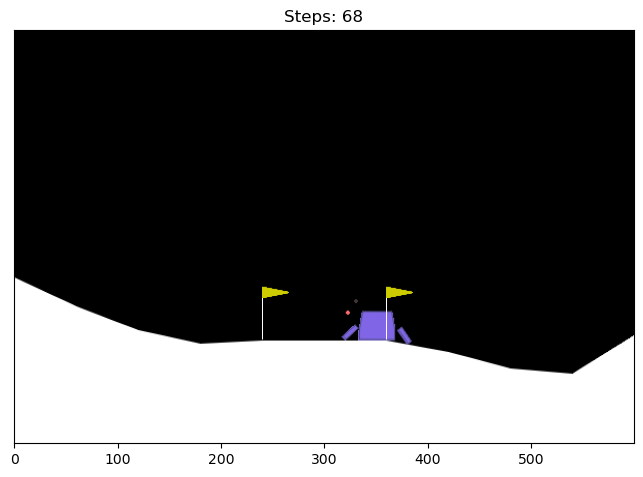

In [6]:
# no seed so different each time
# the goal is to reach an average score on training of at least 200 so that each run is a win
show_video(agent, env, sleep_sec=1e-5)
env.close()